<a href="https://colab.research.google.com/github/falawar7/AAI_635O/blob/main/Week2/P2_FEPractical_Exercise_Building_a_Content_Based_Recommender_System_Using_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
!pip install --upgrade numpy
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 96.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found e

In [6]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

In [1]:
#Importing the libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from gensim import models
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from gensim.models import FastText as ft
from IPython.display import Image
import os
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Download GloVe
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# ------------------- 1. Load Pretrained Word Embeddings -------------------
# Load GloVe embeddings
import pandas as pd
print("Loading GloVe Model...")
glove_df_300 = pd.read_csv('glove.6B.300d.txt', sep=" ",
                       quoting=3, header=None, index_col=0)
glove_model_300 = {key: value.values for key, value in glove_df_300.T.items()}

glove_df_100 = pd.read_csv('glove.6B.100d.txt', sep=" ",
                       quoting=3, header=None, index_col=0)
glove_model_100 = {key: value.values for key, value in glove_df_100.T.items()}

glove_df_50 = pd.read_csv('glove.6B.50d.txt', sep=" ",
                       quoting=3, header=None, index_col=0)
glove_model_50 = {key: value.values for key, value in glove_df_50.T.items()}

# Download the pre-trained model
word2vecModel = api.load("word2vec-google-news-300")

--2025-04-28 17:33:12--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-28 17:33:13--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.07MB/s    in 2m 40s  

2025-04-28 17:35:53 (5.14 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

#Generate Sentence Embeddings
In natural language processing (NLP), sentence embeddings are vector representations that capture the semantic meaning of a whole sentence. Unlike word embeddings, which represent individual words, sentence embeddings attempt to represent the meaning of an entire sentence or phrase.

One straightforward method for generating sentence embeddings is by averaging the word embeddings of the words in the sentence. This method assumes that the meaning of a sentence can be approximated by combining the meanings of the individual words that it contains. Here's how the function get_sentence_vector() works to generate sentence embeddings:

The function takes a sentence as input, tokenizes it into words, and looks up the corresponding word embeddings for each word in a pre-trained model (such as Word2Vec, GloVe, or FastText).
The embeddings of the words are summed up, and the resulting vector is divided by the total number of words found in the model to get an average representation of the sentence.
If any word in the sentence is not present in the embedding model, it is ignored, and the remaining words contribute to the final sentence embedding.
This method provides a simple yet effective way to represent the semantic meaning of a sentence and can be used in various NLP tasks, including similarity comparison, clustering, or feeding into machine learning models for classification or regression.

Below is the implementation of the function that generates a sentence embedding by averaging word vectors.

Explore how changing the dimensionality of word embeddings (e.g., 50, 100, 300) affects the quality of recommendations.

In [3]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=300):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


#Pre-Processing

In [6]:
# Load the dataset
df = pd.read_csv("/content/drive/Othercomputers/THINKPAD-T14/AI/Reommender_System/Week2/Lesson2_From_Course/Rec_sys_content.csv", quotechar='"', escapechar="\\")

# Extract the 3rd column (product description)
product_descriptions = df.iloc[:, 2].dropna().astype(str).tolist()

# Print a few descriptions to verify
print(product_descriptions[:5])  # Print the first 5 descriptions


['New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ', 'Rounded rectangular cat-eye reading glasses. These frames feature a deep burgundy color on the face of the frame with crystal interior, as well as crystal temple detail and yellow, turqoise and black marbled colors on the inside of the temple arms. The standard hinges provide durability and the TR-90 con struction allows for some flex making these glasses very sturdy and perfect for every day use!| Always custom made to your individual order specifications in our FDA Listed Lab with the remarkable Optic

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def clean_text(text):
    # Remove the dollar sign and any other special characters if necessary
    text = re.sub(r'\$', '', text)  # Remove dollar signs
    return text

product_descriptions = [clean_text(description) for description in product_descriptions]

# Compute Embeddings
In this step, we compute the embeddings for each product description using pre-trained models like Word2Vec and GloVe. These models generate vector representations for words, and by averaging the word embeddings in a description, we obtain a vector that represents the entire product description. This enables us to measure the semantic similarity between different products based on their descriptions.

Below is the code to compute the sentence embeddings for each product description using Word2Vec and GloVe:



In [56]:
# ------------------- Compute Embeddings -------------------
word2vec_embeddings = np.array([get_sentence_vector(desc, word2vecModel) for desc in product_descriptions])
glove_embeddings_50 = np.array([get_sentence_vector(desc, glove_model_50, embedding_size=50) for desc in product_descriptions])
glove_embeddings_100 = np.array([get_sentence_vector(desc, glove_model_100, embedding_size=100) for desc in product_descriptions])
glove_embeddings_300 = np.array([get_sentence_vector(desc, glove_model_300, embedding_size=300) for desc in product_descriptions])

# Compute Similarity Scores
This function calculates the similarity between a given product description and all other product descriptions using cosine similarity. It retrieves the most similar products based on their embeddings. To ensure diversity in the recommendations, it also checks for duplicate descriptions and excludes them from the top recommendations. The function then returns the top N most similar products based on their cosine similarity scores.

Below is the code to compute and return the most similar products:

In [74]:
# ------------------- Compute Similarity Scores -------------------
def get_most_similar(query_index, embeddings, descriptions, method="Embedding Model", top_n=10):
    """Compute the most similar products based on cosine similarity."""
    similarities = cosine_similarity([embeddings[query_index]], embeddings)[0]
    sorted_indices = np.argsort(similarities)[::-1][1:]  # Exclude itself

    # Set to track unique descriptions
    unique_descriptions = set()

    # Select top_n most similar products
    top_indices = []
    top_similarities = []
    for idx in sorted_indices:
        if descriptions[idx] not in unique_descriptions:
            unique_descriptions.add(descriptions[idx])
            top_indices.append(idx)
            top_similarities.append(similarities[idx])
        if len(top_indices) == top_n:
            break

    print(f"\n🔹 Top {top_n} Recommendations for: '{descriptions[query_index]}' using {method}")
    for idx, similarity in zip(top_indices, top_similarities):
        print(f"   ✅ {descriptions[idx]} (Similarity: {similarity:.2f})")

    # Return the top_n recommendations' embeddings and descriptions
    top_embeddings = embeddings[top_indices]
    top_descriptions = [descriptions[idx] for idx in top_indices]
    return top_embeddings, top_descriptions

## Task: Visualize the top 10 recommended embeddings in 2D using PCA (Principal Component Analysis).

Instructions:

1- Truncate Labels:

The descriptions of the products can be long. To make the plot readable, truncate the labels to a maximum length (max_label_length).
If the label exceeds this length, append ... at the end. If it doesn't exceed, keep the label as is.
Apply PCA:

2- Use PCA (Principal Component Analysis) to reduce the embeddings (which are high-dimensional vectors) into 2D space. This will help us visualize the embeddings in 2D.
The method fit_transform() can be used to reduce the dimensionality of the embeddings to two components.
Create a Scatter Plot:

3- Use the plt.scatter() function to plot the 2D PCA components on the x and y axes.
Each point on the scatter plot represents one of the top 10 recommended product embeddings.
Annotate the Points:

4- Annotate each point on the scatter plot with its truncated description so you can identify which product corresponds to each point.
Use the plt.annotate() function for this. Ensure the annotations do not overlap by adjusting their position.
Customize Plot:

5- Add a title with plt.title(), and label the x and y axes with plt.xlabel() and plt.ylabel().


In [75]:
# ------------------- Visualizing Top 10 Recommended Embeddings -------------------
def plot_embeddings(embeddings, descriptions, title, max_label_length=30):
    """Visualize the embeddings of the top recommended products."""

    # 1. Truncate descriptions to avoid long labels
    # (Fill in the missing line to truncate product descriptions)
    truncated_labels = [label[:max_label_length] + '...' if len(label) > max_label_length else label for label in descriptions] # Fill this line

    # 2. Apply PCA (Principal Component Analysis)
    # (Fill in the missing line to reduce embeddings to 2D)
    pca = PCA(n_components=2)  # Initialize PCA to reduce to 2 components
    reduced_embeddings = pca.fit_transform(embeddings) # Fill this line

    # 3. Create the scatter plot
    plt.figure(figsize=(12, 10))  # Increased figure size for better readability
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', cmap='virdis')

    # 4. Annotate each point with the truncated description
    for i, label in enumerate(truncated_labels):
        plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, ha='right', va='bottom')

    # Customize the plot
    plt.title(f"{title} Top 10 Recommended Embeddings in 2D")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


📝 Running recommendations using Word2Vec embeddings:

🔹 Top 10 Recommendations for: 'Do You Want Your OtterBox Elevation Tumbler 10 oz To Look Different Than The Rest? You’re in the right place because we’ve got exactly what you’re looking for! This Antique Purple skin is the perfect way to show off your gear! Or with hundreds of other MightySkins designs, you can be sure to find one that you’ll love, and that will show off your unique style! Do You Want To Protect Your OtterBox Elevation Tumbler 10 oz ? With MightySkins your tumbler is protected from scratches, dings, dust, fingertips, and the wear-and-tear of everyday use! Cover your tumbler with a beautiful, stylish decal skin and keep it protected at the same time! Easy to apply, and easy to remove without any sticky residue! Make your favorite gear look like new, and stand out from the crowd! Order With Confidence - Satisfaction Guaranteed! MightySkins are durable, reliable, made in our state-of-the-art production facility in the

<ipython-input-75-3cc166249ab1>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', cmap='virdis')


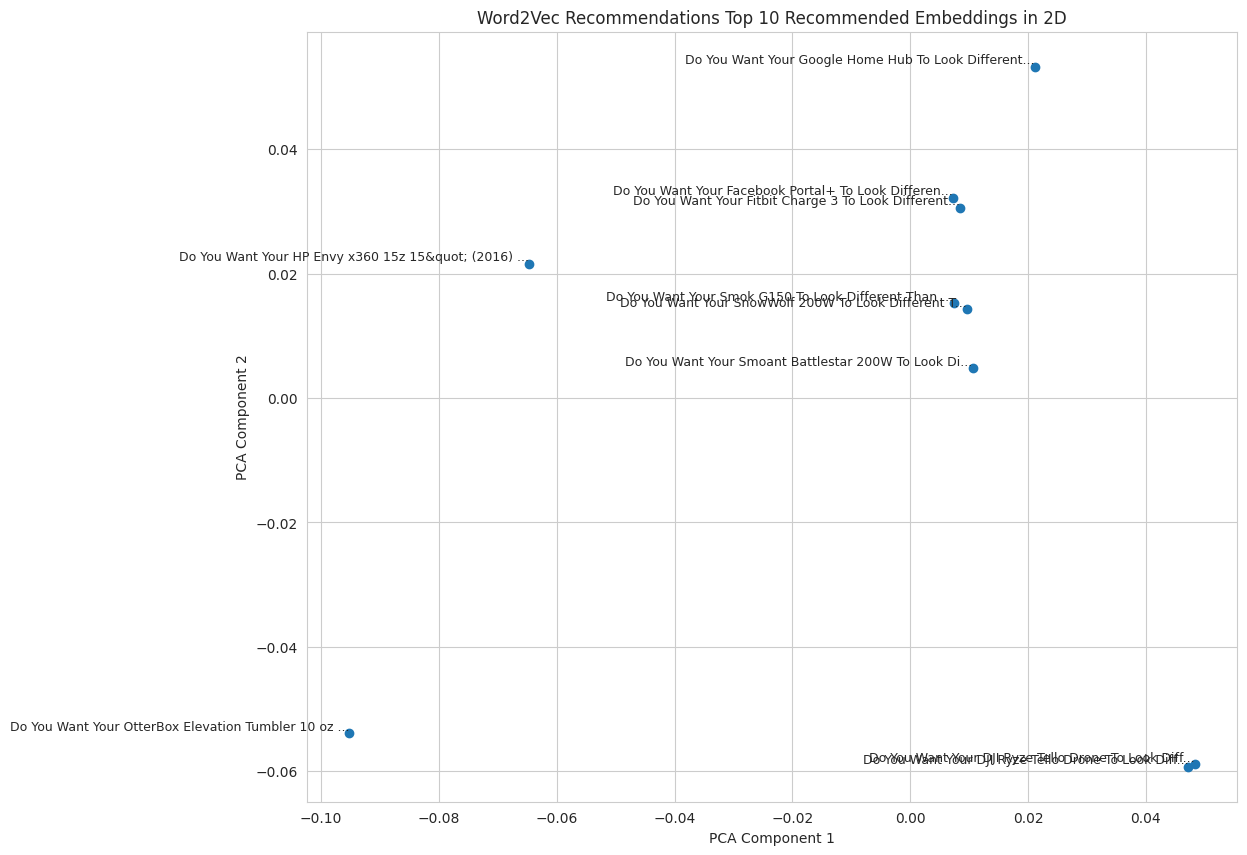


📝 Running recommendations using GloVe50 embeddings:

🔹 Top 10 Recommendations for: 'Do You Want Your OtterBox Elevation Tumbler 10 oz To Look Different Than The Rest? You’re in the right place because we’ve got exactly what you’re looking for! This Antique Purple skin is the perfect way to show off your gear! Or with hundreds of other MightySkins designs, you can be sure to find one that you’ll love, and that will show off your unique style! Do You Want To Protect Your OtterBox Elevation Tumbler 10 oz ? With MightySkins your tumbler is protected from scratches, dings, dust, fingertips, and the wear-and-tear of everyday use! Cover your tumbler with a beautiful, stylish decal skin and keep it protected at the same time! Easy to apply, and easy to remove without any sticky residue! Make your favorite gear look like new, and stand out from the crowd! Order With Confidence - Satisfaction Guaranteed! MightySkins are durable, reliable, made in our state-of-the-art production facility in the 

<ipython-input-75-3cc166249ab1>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', cmap='virdis')


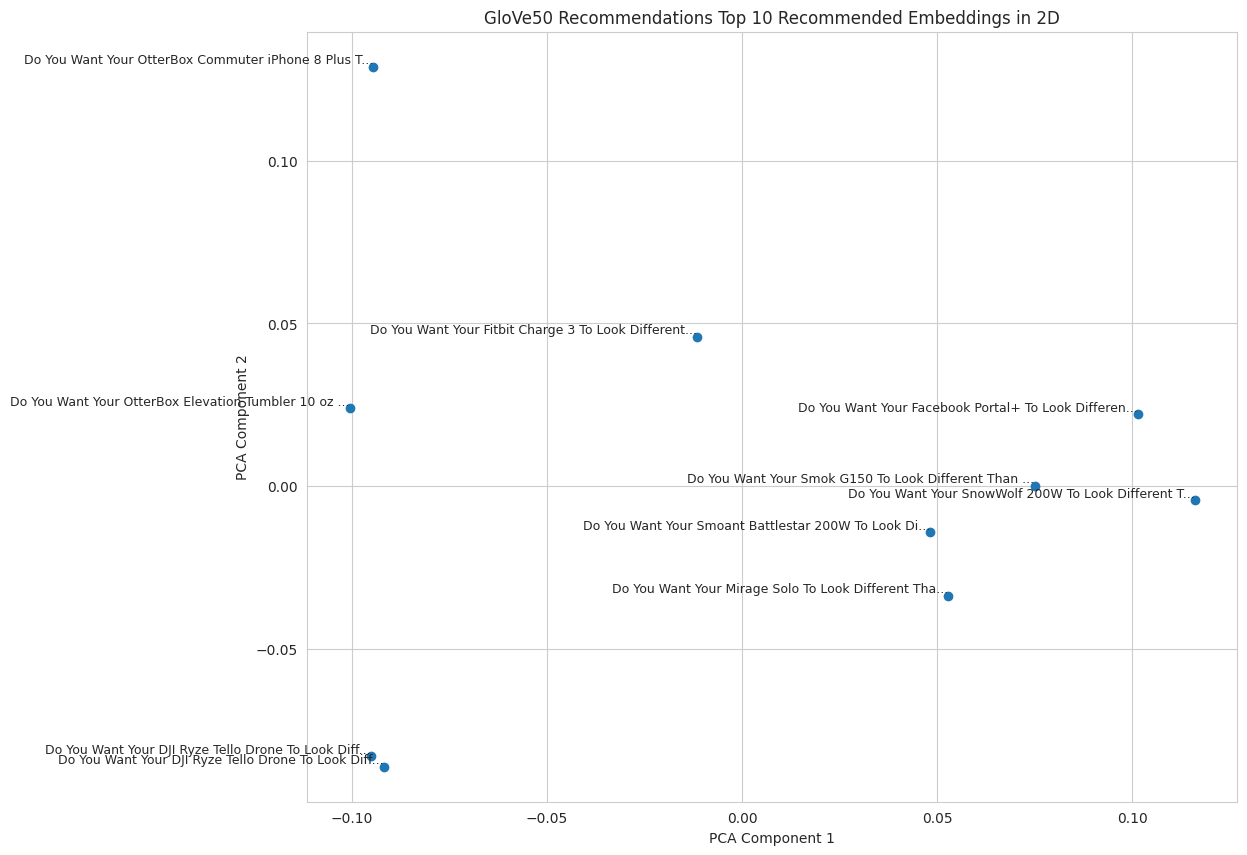


📝 Running recommendations using GloVe100 embeddings:

🔹 Top 10 Recommendations for: 'Do You Want Your OtterBox Elevation Tumbler 10 oz To Look Different Than The Rest? You’re in the right place because we’ve got exactly what you’re looking for! This Antique Purple skin is the perfect way to show off your gear! Or with hundreds of other MightySkins designs, you can be sure to find one that you’ll love, and that will show off your unique style! Do You Want To Protect Your OtterBox Elevation Tumbler 10 oz ? With MightySkins your tumbler is protected from scratches, dings, dust, fingertips, and the wear-and-tear of everyday use! Cover your tumbler with a beautiful, stylish decal skin and keep it protected at the same time! Easy to apply, and easy to remove without any sticky residue! Make your favorite gear look like new, and stand out from the crowd! Order With Confidence - Satisfaction Guaranteed! MightySkins are durable, reliable, made in our state-of-the-art production facility in the

<ipython-input-75-3cc166249ab1>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', cmap='virdis')


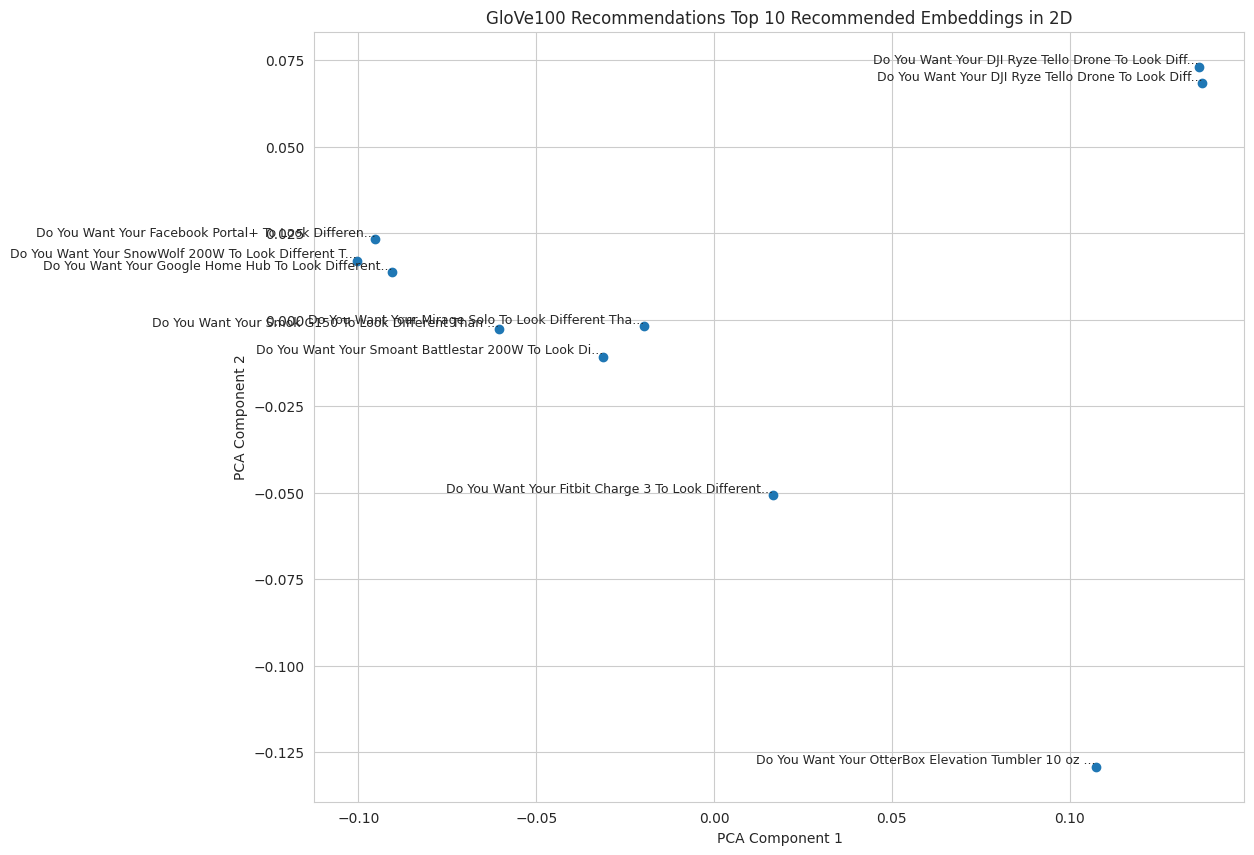


📝 Running recommendations using GloVe300 embeddings:

🔹 Top 10 Recommendations for: 'Do You Want Your OtterBox Elevation Tumbler 10 oz To Look Different Than The Rest? You’re in the right place because we’ve got exactly what you’re looking for! This Antique Purple skin is the perfect way to show off your gear! Or with hundreds of other MightySkins designs, you can be sure to find one that you’ll love, and that will show off your unique style! Do You Want To Protect Your OtterBox Elevation Tumbler 10 oz ? With MightySkins your tumbler is protected from scratches, dings, dust, fingertips, and the wear-and-tear of everyday use! Cover your tumbler with a beautiful, stylish decal skin and keep it protected at the same time! Easy to apply, and easy to remove without any sticky residue! Make your favorite gear look like new, and stand out from the crowd! Order With Confidence - Satisfaction Guaranteed! MightySkins are durable, reliable, made in our state-of-the-art production facility in the

<ipython-input-75-3cc166249ab1>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', cmap='virdis')


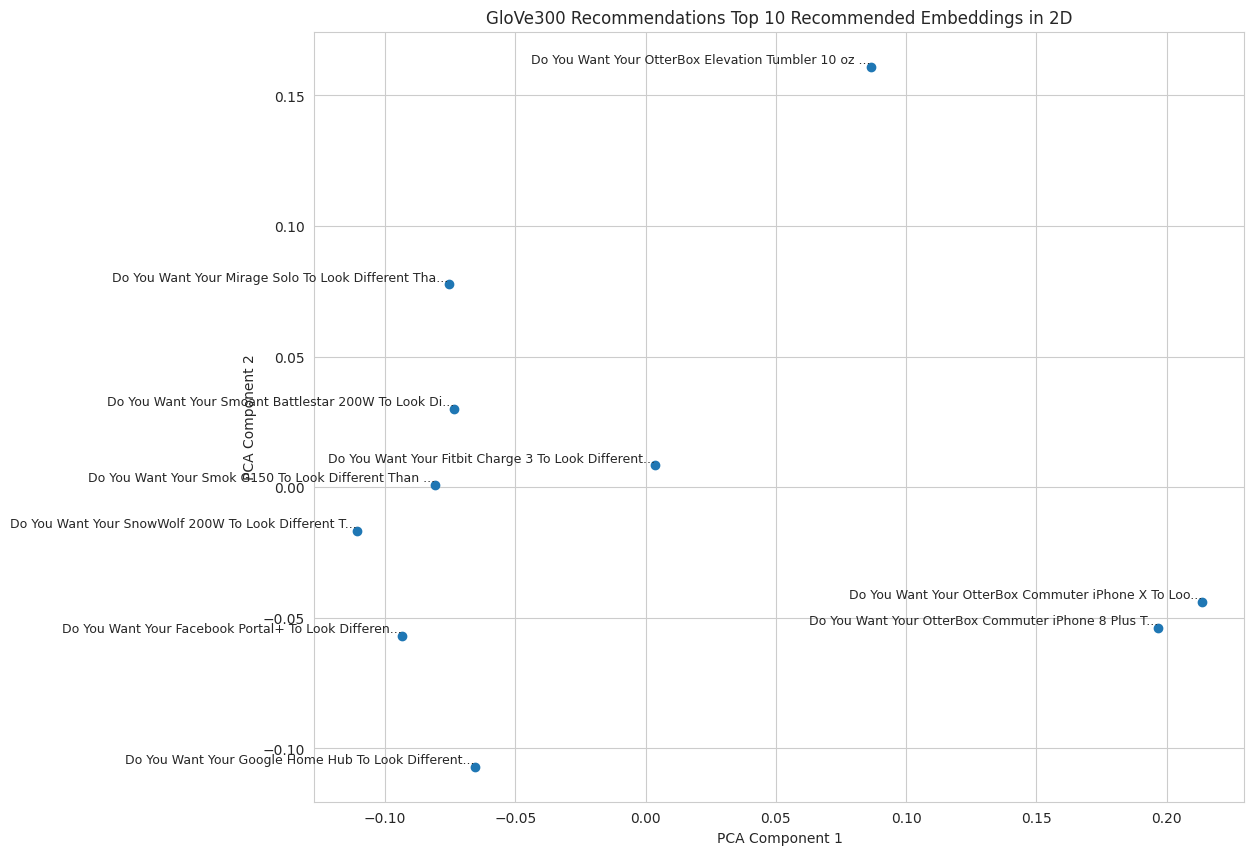

In [76]:
# ------------------- Running for Multiple Models -------------------
def process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10):
    """Process and plot the top recommendations for multiple models (Word2Vec, GloVe)."""
    for method, embeddings in embeddings_dict.items():
        print(f"\n📝 Running recommendations using {method} embeddings:")
        top_embeddings, top_descriptions = get_most_similar(query_product, embeddings, product_descriptions, method, top_n)
        plot_embeddings(top_embeddings, top_descriptions, f"{method} Recommendations", max_label_length=50)


embeddings_dict = {
    "Word2Vec": word2vec_embeddings,
    "GloVe50": glove_embeddings_50,
    "GloVe100": glove_embeddings_100,
    "GloVe300": glove_embeddings_300
}

# Choose a product to base recommendations on0
query_product = 5  # Choose first product for example

# Process and visualize for all models
process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10)

In [77]:
def get_most_similar(query_index, embeddings, descriptions, method_name, top_n=10):
    """Get top N most similar items to the query product based on cosine similarity."""
    query_vector = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_vector, embeddings)[0]
    similarities[query_index] = -1  # Exclude self

    top_indices = similarities.argsort()[::10][:top_n]
    top_scores = similarities[top_indices]
    top_descriptions = [descriptions[i] for i in top_indices]

    return top_indices, top_scores, top_descriptions


In [79]:
query_product = 5

for dim, embeddings in zip([50, 100, 300] ,[glove_embeddings_50, glove_embeddings_100, glove_embeddings_300]):
    top_indices, top_scores, top_descs = get_most_similar(query_product, embeddings, product_descriptions, f"GloVe {dim}", top_n=10)
    print(f"\n GloVe-{dim} Similarities for Product #{query_product}:")
    for rank, (score, desc) in enumerate(zip(top_scores, top_descs), 1):
        print(f"{rank}. Similarity: {score:.4f} | {desc[:80]}{'...' if len(desc) > 80 else ''}")



 GloVe-50 Similarities for Product #5:
1. Similarity: -1.0000 | Do You Want Your OtterBox Elevation Tumbler 10 oz To Look Different Than The Res...
2. Similarity: 0.1533 | |KBM-001 BRN M
3. Similarity: 0.1533 | |KBM-001 BRN M
4. Similarity: 0.4885 | |Stepping Stones
5. Similarity: 0.6411 | - Compatible Adapter for HP dv2035US- Laptop Battery Charger Replacement HP Pavi...
6. Similarity: 0.7284 | |Birthday Girl Rhinestone Shirt Red XS (8)
7. Similarity: 0.7519 |  Windproof, waterproof and breathable jacket featuring XR-Silver weatherproof te...
8. Similarity: 0.7813 | |2015 Ferrari 488 Spider in Metallic Blue- Limited Edition Resin Scale Model in ...
9. Similarity: 0.8032 | Features: Type: -Raised Panel. Material: -PVC Vinyl. Dimensions: Size 31&quot; H...
10. Similarity: 0.8032 | Features: Type: -Raised Panel. Material: -PVC Vinyl. Dimensions: Size 31&quot; H...

 GloVe-100 Similarities for Product #5:
1. Similarity: -1.0000 | Do You Want Your OtterBox Elevation Tumbler 10 oz To Look 

In [80]:
query_product = 30

for dim, embeddings in zip([50, 100, 300] ,[glove_embeddings_50, glove_embeddings_100, glove_embeddings_300]):
    top_indices, top_scores, top_descs = get_most_similar(query_product, embeddings, product_descriptions, f"GloVe {dim}", top_n=10)
    print(f"\n GloVe-{dim} Similarities for Product #{query_product}:")
    for rank, (score, desc) in enumerate(zip(top_scores, top_descs), 1):
        print(f"{rank}. Similarity: {score:.4f} | {desc[:80]}{'...' if len(desc) > 80 else ''}")


 GloVe-50 Similarities for Product #30:
1. Similarity: -1.0000 | Do You Want Your Mirage Solo To Look Different Than The Rest? You’re in the righ...
2. Similarity: 0.1379 | |KBM-001 BRN M
3. Similarity: 0.1561 | Chaincase Oil Seal. Yamaha BR250 Bravo 1992-1993 Yamaha BR250 Bravo 1982-1990 Ya...
4. Similarity: 0.4822 | Babor Fluids FP Pure Intense Balancing Fluid 24x2ml Ampules Pro SizeNIB|
5. Similarity: 0.6401 | - Compatible Adapter for HP dv2035US- Laptop Battery Charger Replacement HP Pavi...
6. Similarity: 0.7259 | MUCINEX CF&amp;ST 6/6FZ, MUCINEX CF&amp;ST 6/6FZ|Ten Day Results Downsize, 60 Ct
7. Similarity: 0.7433 |  Windproof, waterproof and breathable jacket featuring XR-Silver weatherproof te...
8. Similarity: 0.7774 | |WP000-1285-02-MD 1285-02-MD Sling Arm Deluxe Denim Med Blue 1285-02-MD From Sco...
9. Similarity: 0.7977 | Unisex keyhole round thin plastic horn rim multi-focus progressive reader eyegla...
10. Similarity: 0.7984 | Unisex folding narrow rectangular clear lens